<a href="https://colab.research.google.com/github/dbonchaicodez/Google-Colab-Sol/blob/main/spamdetectionfspfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [38]:
df = pd.read_csv('./drive/MyDrive/FSP/spam.csv', encoding='latin1')

In [39]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [40]:
df.isnull().sum().values

array([   0,    0, 5522, 5560, 5566])

### Data Preprocessing
Addresses inconsistencies, errors, and inaccuracies in the dataset. Makes the dataset suitable for Model Training.

In [41]:
df['label'] = df['v1'].map({'ham': 0, 'spam': 1})

In [42]:
df['v2'] = df['v2'].str.lower()

In [43]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

In [44]:
nltk.download('stopwords')
ps = PorterStemmer()
all_stopwords = stopwords.words('english')

def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    cleaned_words = [ps.stem(word) for word in words if word not in all_stopwords]
    return " ".join(cleaned_words)


df['v2'] = df['v2'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)
x = tfidf.fit_transform(df['v2']).toarray()
y = df['v1'].values

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,train_size=0.8,stratify=y)

In [47]:
#logistic regression
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
y_pred_lr

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [48]:
from sklearn.metrics import (precision_score, recall_score, f1_score, confusion_matrix)
def evaluate_model(y_true, y_pred):
    precision = precision_score(y_true, y_pred, pos_label='spam')
    recall = recall_score(y_true, y_pred, pos_label='spam')
    f1 = f1_score(y_true, y_pred, pos_label='spam')

    tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=['ham', 'spam']).ravel()

    return precision, recall, f1, tp, fp, tn, fn

In [49]:
#naive bayes
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train, y_train)
y_pred_nb = nb.predict(x_test)

In [50]:
lr_precision, lr_recall, lr_f1, lr_tp, lr_fp, lr_tn, lr_fn = evaluate_model(y_test, y_pred_lr)
print(f"Logistic Regression Metrics:\nPrecision: {lr_precision:.4f}\nRecall: {lr_recall:.4f}\nF1-Score: {lr_f1:.4f}\nTrue Positives (TP): {lr_tp}\nFalse Positives (FP): {lr_fp}\nTrue Negatives (TN): {lr_tn}\nFalse Negatives (FN): {lr_fn}\n")

nb_precision, nb_recall, nb_f1, nb_tp, nb_fp, nb_tn, nb_fn = evaluate_model(y_test, y_pred_nb)
print(f"Naive Bayes Metrics:\nPrecision: {nb_precision:.4f}\nRecall: {nb_recall:.4f}\nF1-Score: {nb_f1:.4f}\nTrue Positives (TP): {nb_tp}\nFalse Positives (FP): {nb_fp}\nTrue Negatives (TN): {nb_tn}\nFalse Negatives (FN): {nb_fn}")

Logistic Regression Metrics:
Precision: 0.9909
Recall: 0.7315
F1-Score: 0.8417
True Positives (TP): 109
False Positives (FP): 1
True Negatives (TN): 965
False Negatives (FN): 40

Naive Bayes Metrics:
Precision: 0.9918
Recall: 0.8121
F1-Score: 0.8930
True Positives (TP): 121
False Positives (FP): 1
True Negatives (TN): 965
False Negatives (FN): 28


## Model Performance Analysis

Based on the confusion matrices and the precision/recall bar chart, we can compare the performance of the Logistic Regression and Naive Bayes models for spam detection:

**1. Confusion Matrices Analysis:**

*   **True Negatives (TN):** Both models correctly identified 965 instances of 'ham' (non-spam) messages. This indicates excellent performance in identifying legitimate messages, with very few false alarms.
*   **False Positives (FP):** Both models had a very low number of false positives (1 each). This is crucial for spam detection, as classifying a legitimate message as spam (false positive) can be highly disruptive to the user. Both models excel in this aspect.
*   **True Positives (TP):** Naive Bayes identified 121 true positives (correctly classified spam messages), while Logistic Regression identified 109. This suggests Naive Bayes is slightly better at catching actual spam.
*   **False Negatives (FN):** Logistic Regression had 40 false negatives (spam messages classified as ham), whereas Naive Bayes had 28. A lower number of false negatives is desirable, as it means fewer spam messages are missed. Naive Bayes performs better here.

**2. Precision and Recall Scores Analysis:**

*   **Precision:** Both models show exceptionally high precision (around 0.99). This means that when they predict a message is spam, they are almost always correct. There is a slight edge for Naive Bayes (0.9918) over Logistic Regression (0.9909).
*   **Recall:** Naive Bayes significantly outperforms Logistic Regression in terms of recall (0.8121 vs. 0.7315). This indicates that Naive Bayes is better at identifying a larger proportion of the actual spam messages available in the dataset. Logistic Regression misses more spam messages (higher false negatives).

**3. Overall Comparison:**

*   Both models demonstrate high precision, which is excellent for minimizing false alarms.
*   Naive Bayes shows a clear advantage in **recall**, meaning it is more effective at detecting a higher percentage of true spam messages, leading to fewer missed spam. This is also reflected in its lower number of false negatives and higher number of true positives.
*   Considering the F1-score (which balances precision and recall), Naive Bayes (0.8930) also performs better than Logistic Regression (0.8417), reinforcing its overall superior performance for this specific spam detection task.

In conclusion, while both models perform well, **Naive Bayes is the preferred model for this spam detection task** due to its significantly higher recall and F1-score, indicating a better ability to capture actual spam while maintaining high precision.

## Visualization of Confusion Matrices

Side-by-side heatmap visualizations of the confusion matrices for both Logistic Regression and Naive Bayes models. Each heatmap clearly label the axes and cells (True Positive, False Positive, False Negative, True Negative).


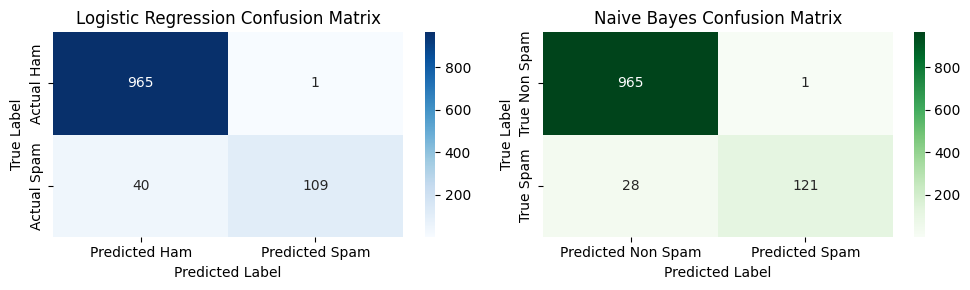

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns


fig, ax = plt.subplots(1, 2, figsize=(10, 3))

#Logistic Regression Confusion Matrix
lr_confusion_matrix = np.array([[lr_tn, lr_fp], [lr_fn, lr_tp]])
sns.heatmap(lr_confusion_matrix, annot=True, fmt='d', cmap='Blues', ax=ax[0],
            xticklabels=['Predicted Ham', 'Predicted Spam'],
            yticklabels=['Actual Ham', 'Actual Spam'])
ax[0].set_title('Logistic Regression Confusion Matrix')
ax[0].set_xlabel('Predicted Label')
ax[0].set_ylabel('True Label')

#Naive Bayes Confusion Matrix
nb_confusion_matrix = np.array([[nb_tn, nb_fp], [nb_fn, nb_tp]])
sns.heatmap(nb_confusion_matrix, annot=True, fmt='d', cmap='Greens', ax=ax[1],
            xticklabels=['Predicted Non Spam', 'Predicted Spam'],
            yticklabels=['True Non Spam', 'True Spam'])
ax[1].set_title('Naive Bayes Confusion Matrix')
ax[1].set_xlabel('Predicted Label')
ax[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()


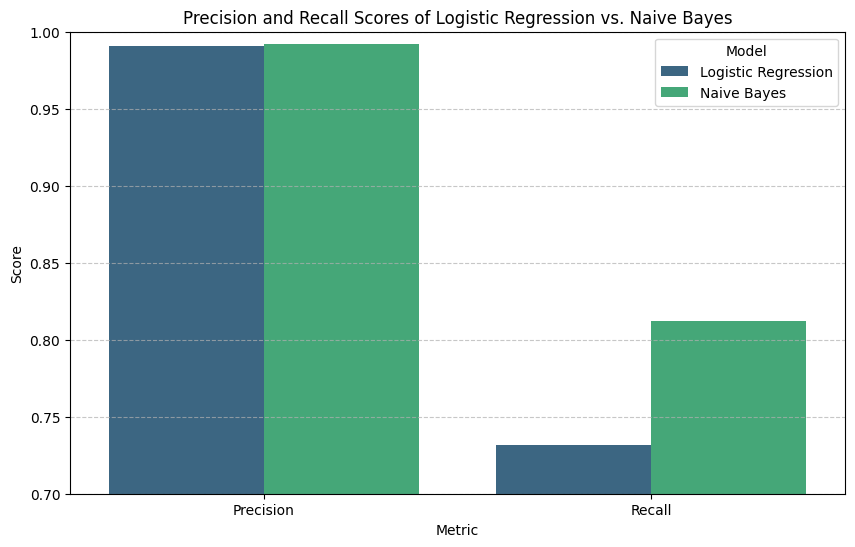

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
metrics_data = {
    'Model': ['Logistic Regression', 'Logistic Regression', 'Naive Bayes', 'Naive Bayes'],
    'Metric': ['Precision', 'Recall', 'Precision', 'Recall'],
    'Score': [lr_precision, lr_recall, nb_precision, nb_recall]
}
metrics_df = pd.DataFrame(metrics_data)
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Score', hue='Model', data=metrics_df, palette='viridis')
plt.title('Precision and Recall Scores of Logistic Regression vs. Naive Bayes')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.ylim(0.7, 1.0)
plt.legend(title='Model')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Summary:

### Q&A
The performance of the Logistic Regression and Naive Bayes models was analyzed based on their confusion matrices, precision, and recall.

### Data Analysis Key Findings
*   Both Logistic Regression and Naive Bayes models demonstrated excellent performance in identifying 'ham' (non-spam) messages, achieving 965 True Negatives and only 1 False Positive each. This indicates a high ability to avoid false alarms.
*   Naive Bayes showed superior performance in detecting actual spam messages, with 121 True Positives compared to 109 for Logistic Regression.
*   Logistic Regression had more False Negatives (40) than Naive Bayes (28), meaning it missed more spam messages.
*   Both models achieved very high precision scores, with Naive Bayes slightly higher at 0.9918 compared to Logistic Regression's 0.9909. This suggests that when they predict a message is spam, they are almost always correct.
*   Naive Bayes significantly outperformed Logistic Regression in terms of recall, achieving 0.8121 compared to Logistic Regression's 0.7315. This indicates Naive Bayes is better at identifying a larger proportion of the total actual spam messages.
*   The F1-score, which balances precision and recall, was higher for Naive Bayes (0.8930) than for Logistic Regression (0.8417), indicating better overall performance for Naive Bayes.

### Key Insights
*   For this spam detection task, Naive Bayes is the preferred model due to its significantly higher recall and F1-score, making it more effective at catching spam messages while maintaining very high precision.
*   Further analysis could involve exploring other classification algorithms or optimizing the current models' hyperparameters to potentially further improve recall without significantly compromising precision.
